#### Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import Precision, Recall

### Creating the class for Data collection to Model training

In [2]:
class CNN_Model_Creation:
    
    # To load the images as dataset
    def load_dataset(self,file_path,image_size,batch_size):
        data = tf.keras.preprocessing.image_dataset_from_directory(
                        file_path,
                        shuffle=True,
                        image_size = (image_size, image_size),
                        batch_size = batch_size
                    )
        return data
        
    # Preprocess and Train Test Split
    def preprocess_and_split(self,data,train_size, test_size):
        
        data = data.shuffle(10000)
        data = data.map(lambda x,y:(x/255,y)) #To scale the data from 0 to 1
        len_train = int(len(data)*train_size)
        len_test = int(len(data)*test_size)
        
        train_data = data.take(len_train)
        test_data = data.skip(len_train).take(len_test)
        valid_data = data.skip(len_train).skip(len_test)
        return train_data,test_data,valid_data
    
    
    def model_creation(self):
        model=Sequential() #CNN model with maxpooling and dropout layers

        model.add(Conv2D(64,(3,3),1, activation='relu', input_shape=(256,256,3)))
        model.add(MaxPooling2D())
        model.add(Dropout(0.5)) #To reduce overfitting
        

        model.add(Conv2D(32,(3,3),1, activation='relu', input_shape=(256,256,2)))
        model.add(MaxPooling2D())
        model.add(Dropout(0.4))

        model.add(Conv2D(32,(3,3),1, activation='relu', input_shape=(256,256,2)))
        model.add(MaxPooling2D())
        model.add(Dropout(0.3))

        model.add(Conv2D(32,(3,3),1, activation='relu', input_shape=(256,256,2)))
        model.add(MaxPooling2D())
        model.add(Dropout(0.2))

        model.add(Conv2D(32,(3,3),1, activation='relu', input_shape=(256,256,2)))
        model.add(MaxPooling2D())
        model.add(Dropout(0.4))

        model.add(Conv2D(32,(3,3),1, activation='relu', input_shape=(256,256,2)))
        model.add(MaxPooling2D())

        model.add(Flatten())

        model.add(Dense(64,activation='relu'))
        model.add(Dense(1,activation='sigmoid')) # To get the output
        
        model.summary()
        
        # Model Compiling
        model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                      metrics=['accuracy'])
        return model
    
    # To train the model
    def train_model(self,model,train_data, valid_data):
        history = model.fit(
                    train_data,
                    epochs = 6,
                    batch_size = 32,
                    validation_data = valid_data
                )
        return history #For knowing the performance and other things of training and validation sets
    
    # To plot the accuracy vs validation accuracy
    def plot_scores(self,history,epochs):
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        
        plt.figure(figsize=(8,8))
        plt.subplot(1,2,1)
        plt.plot(range(epochs), acc, label='Training Accuracy')
        plt.plot(range(epochs), val_acc, label='Validation Accuracy')
        plt.legend(loc='best')
        plt.title('Training Accuracy VS Validation Accuracy')
        plt.show()
    
    # To plot the training loss vs validation loss
    def plot_loss(self,history,epochs):
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        
        plt.figure(figsize=(8,8))
        plt.subplot(1,2,1)
        plt.plot(range(epochs), loss, label='Training Loss')
        plt.plot(range(epochs), val_loss, label='Validation Loss')
        plt.legend(loc='best')
        plt.title('Training Loss VS Validation Loss')
        plt.show()
    
    # To predict the test data and find the performance of the model
    def predict_and_find_scores(self,test_data,model):
        precision_score = Precision()
        recall_score = Recall()
        for batch in test_data.as_numpy_iterator():
            X, y = batch
            y_pred = model.predict(X)
            
            precision_score.update_state(y,y_pred)
            recall_score.update_state(y,y_pred)
        
        print(f"Precision score: {precision_score.result().numpy()}")
        print(f"Recall score: {recall_score.result().numpy()}")        

In [3]:
#Creating an instance to train and to find the performance of the model
cnn = CNN_Model_Creation()

In [4]:
# Load the provided data
data = cnn.load_dataset('Datasets/PlantVillage',256,32)

Found 2471 files belonging to 2 classes.


In [5]:
# Split the data into train, validation and test sets by providing train_size and test_size
train_data,test_data,valid_data = cnn.preprocess_and_split(data,.8,.1)

In [6]:
train_data.as_numpy_iterator().next()

(array([[[[0.5294118 , 0.45882353, 0.4509804 ],
          [0.5137255 , 0.44313726, 0.43529412],
          [0.5019608 , 0.43137255, 0.42352942],
          ...,
          [0.5058824 , 0.45882353, 0.45882353],
          [0.52156866, 0.4745098 , 0.4745098 ],
          [0.5372549 , 0.49019608, 0.49019608]],
 
         [[0.53333336, 0.4627451 , 0.45490196],
          [0.5254902 , 0.45490196, 0.44705883],
          [0.52156866, 0.4509804 , 0.44313726],
          ...,
          [0.5137255 , 0.46666667, 0.46666667],
          [0.52156866, 0.4745098 , 0.4745098 ],
          [0.53333336, 0.4862745 , 0.4862745 ]],
 
         [[0.5254902 , 0.45490196, 0.44705883],
          [0.5254902 , 0.45490196, 0.44705883],
          [0.5294118 , 0.45882353, 0.4509804 ],
          ...,
          [0.53333336, 0.4862745 , 0.4862745 ],
          [0.5372549 , 0.49019608, 0.49019608],
          [0.53333336, 0.4862745 , 0.4862745 ]],
 
         ...,
 
         [[0.4392157 , 0.3882353 , 0.41568628],
          [0.52549

In [7]:
# Model Creation
model = cnn.model_creation()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 127, 127, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 32)        0

In [8]:
# Train the compiled model
history = cnn.train_model(model,train_data,valid_data)

Epoch 1/6
62/62 [==============================] - 219s 3s/step - loss: 0.6725 - accuracy: 0.5784 - val_loss: 0.6914 - val_accuracy: 0.5486
Epoch 2/6
62/62 [==============================] - 196s 3s/step - loss: 0.5134 - accuracy: 0.7489 - val_loss: 0.4204 - val_accuracy: 0.8472
Epoch 3/6
62/62 [==============================] - 194s 3s/step - loss: 0.2519 - accuracy: 0.9108 - val_loss: 0.2804 - val_accuracy: 0.9479
Epoch 4/6
62/62 [==============================] - 715s 12s/step - loss: 0.1955 - accuracy: 0.9299 - val_loss: 0.2154 - val_accuracy: 0.9618
Epoch 5/6
62/62 [==============================] - 200s 3s/step - loss: 0.2029 - accuracy: 0.9530 - val_loss: 0.1743 - val_accuracy: 0.9722
Epoch 6/6
62/62 [==============================] - 195s 3s/step - loss: 0.1750 - accuracy: 0.9648 - val_loss: 0.2975 - val_accuracy: 0.9549


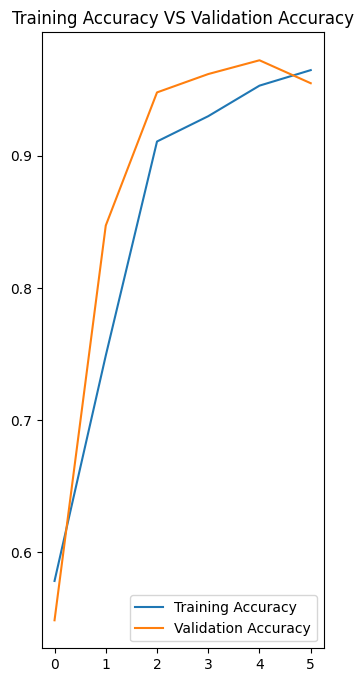

In [9]:
# Plot the graph between accuracy of train and validation data
cnn.plot_scores(history,6)

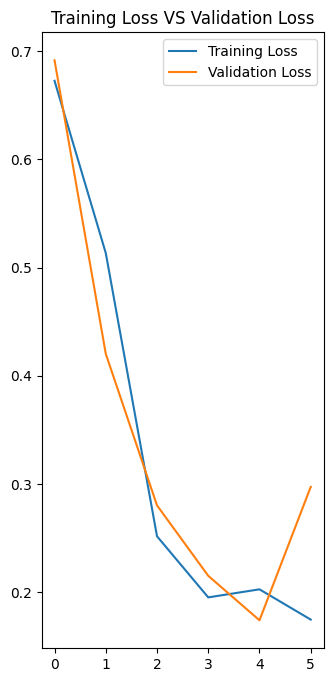

In [10]:
# Plot the graph between loss of train and validation data
cnn.plot_loss(history,6)

In [11]:
# To predict the test_data and to find the performance of model
cnn.predict_and_find_scores(test_data,model)

1/1 [==============================] - 1s 586ms/step
Precision score: 0.9729729890823364
Recall score: 0.9931034445762634
